In [1]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      703 non-null    object
 1   Price     703 non-null    object
 2   Open      703 non-null    object
 3   High      703 non-null    object
 4   Low       703 non-null    object
 5   Vol.      703 non-null    object
 6   Change %  703 non-null    object
dtypes: object(7)
memory usage: 38.6+ KB


In [3]:
df.Price.replace(',','',regex = True, inplace = True)
df.Open.replace(',','',regex = True, inplace = True)
df.High.replace(',','',regex = True, inplace = True)
df.Low.replace(',','',regex = True, inplace = True)
df['Vol.'].replace(to_replace='K', value='', regex=True, inplace = True)
df['Vol.'].replace(to_replace='M', value='', regex=True, inplace = True)
df['Change %'].replace(to_replace='%', value='', regex=True, inplace = True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float, copy = False)
df.Date = pd.to_datetime(df.Date, format = '%b %d, %Y')
df = df.drop(columns=['Change %', 'Vol.'])
df = df.rename(columns = {'Price' : 'Close'})
df.set_index('Date', inplace = True)
df.sort_index(inplace = True)
#df = df.sort_values('Date', ignore_index = True)

df




,Close,Open,High,Low
Date,,,,
2020-03-01,8540.0,8543.8,8737.2,8437.2
2020-03-02,8904.8,8537.5,8961.8,8503.1
2020-03-03,8761.4,8906.1,8911.7,8669.3
2020-03-04,8757.9,8761.3,8840.3,8679.7
2020-03-05,9060.3,8757.9,9147.3,8751.5
...,...,...,...,...
2022-01-28,37745.1,37195.6,37995.9,36176.5
2022-01-29,38170.8,37736.5,38663.7,37350.2
2022-01-30,37917.7,38167.5,38313.3,37390.6


## Random Steps

info {'total_reward': 8111.299999999988, 'total_profit': 0.5176324517828806, 'position': 1}


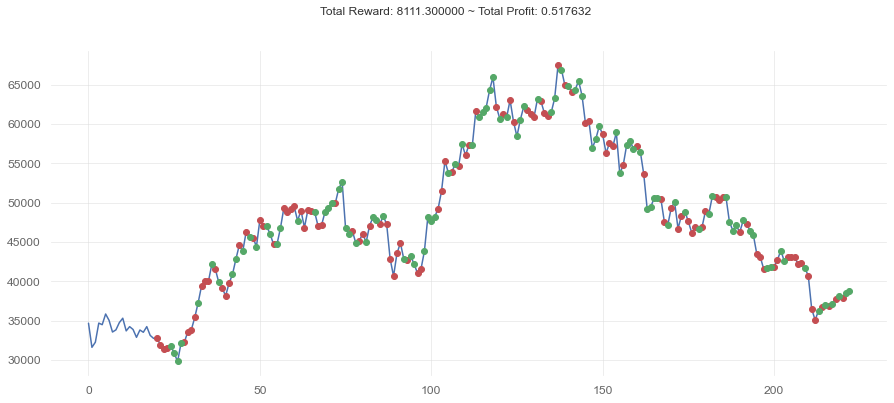

In [5]:
#running the test environment
window_size = 20
start_index = window_size + 480
end_index = len(df)


env = gym.make('stocks-v0', df=df, frame_bound=(start_index,end_index), window_size=window_size)
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()